# Nuclear Chart plotter

Created on 05 November 2019

@author: Jonas Karthein<br/>
@contact: jonas.karthein@cern.ch<br/>
@license: MIT license

### References
[1]: W.J. Huang, et al. Chinese Phys. C 41, 030002 (2017).<br/>
[2]: [Linguistics Pro Font (= Utopia Font incl. math symbols](https://www.fontsquirrel.com/fonts/linguistics-pro)

### Application
The code was used for the dissertation of Jonas Karthein and for several scientific presentations.

### Introduction
The following code was written to provide publication-ready plots of the nuclear chart, based on the Atomic Mass Evaluation 2016 [1].

### Required software and libraries
The following code was written in Python 3.7. The required libraries are listed below with a rough description for their task in the code. It doesn't claim to be a full description of the library.

- pandas (data storage and calculation)<br/>
- numpy (calculation)<br/>
- matplotlib (plotting)<br/>
- jupyter (Python notebook environment)<br/>

All packages can be fetched using pip:

In [1]:
!pip3 install pandas numpy matplotlib jupyter

In [2]:
import pandas as pd
import numpy as np

# loading the AME16 mass evaluation table
ame_df = pd.read_fwf('bin/ame16.txt',
                      skiprows=39,
                      names=['new_el', 'N_Z', 'N', 'Z', 'A', 'el', 'o', 'ME_keV',
                            'ME_unc_keV', 'BE_keV',
                            'BE_unc_keV', 'B', 'Q_keV',
                            'Q_unc_keV', 'mass_micro_u',
                            'mass_unc_micro_u'],
                      widths=[1,3,5,5,5,4,4,15,11,12,7,3,11,9,17,11])

# loading the NUBASE16 table including information about isomers
nubase_df = pd.read_fwf('bin/nubase16.txt',
                      names=['A', 'Z_+', 'el', 'ME_keV',
                            'ME_unc_keV', 'Ex_keV',
                            'Ex_unc_keV', 'Ex_origin', 't_1_2', 't_1_2_unit', 't_1_2_unc', 'JP', 'T',
                            'ensdf', 'ref', 'yr', 'decay'],
                      widths=[4,7,7,11,9,10,8,4,9,3,7,8,6,3,9,5,77])

# adding necessary info like the proton number Z, neutron number N, and the year of discovery for plotting
nubase_df['Z'] = nubase_df['Z_+'].str[0:3].astype(int)
nubase_df['N'] = nubase_df.A - nubase_df.Z
nubase_df.yr = nubase_df.yr.fillna(9999).astype(int)   # not discovered yet -> year = 9999
nubase_df = nubase_df.set_index('el')

# marking the extrapolated values, removing the '#' and '*' symbols and converting all values into floats
ame_df['extrapol'] = (ame_df.ME_keV.str[-1] == '#')
ame_df = ame_df.replace('#', '.0', regex=True)
ame_df = ame_df.replace('*', np.nan)
ame_df[['ME_keV','ME_unc_keV','BE_keV','BE_unc_keV','Q_keV',
        'Q_unc_keV','mass_micro_u','mass_unc_micro_u']] = ame_df[['ME_keV','ME_unc_keV','BE_keV',
                                                                  'BE_unc_keV','Q_keV','Q_unc_keV',
                                                                  'mass_micro_u','mass_unc_micro_u'
                                                                 ]].apply(pd.to_numeric)
nubase_df['extrapol'] = (nubase_df.ME_keV.str[-1] == '#')
nubase_df = nubase_df.replace('#', '.0', regex=True)
nubase_df[['ME_keV','ME_unc_keV','Ex_keV','Ex_unc_keV']] = nubase_df[['ME_keV','ME_unc_keV','Ex_keV',
                                                                  'Ex_unc_keV']].apply(pd.to_numeric, errors='coerce')


# read ISOLDE yield info
import xml.etree.ElementTree as ET
import re
isolde_yields = {}

for child in ET.parse('bin/Isolde-nuclide-chart-bigger.xml').getroot():
    el = child.attrib['id']
    yields = child[2].text
    isolde_yields[re.findall('\d+', el)[0]+re.findall('[A-Za-z]+', el)[0]] = yields
nubase_df['isolde_yields'] = pd.Series(isolde_yields)
nubase_df['isolde_yields_log'] = np.log(nubase_df.isolde_yields.astype(float))
ame_df['mass_prec'] = np.log(abs(np.log(ame_df.mass_unc_micro_u[(ame_df.extrapol == False)] / 
                             ame_df.mass_micro_u[(ame_df.extrapol == False)])))
nubase_df

/usr/local/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,A,Z_+,ME_keV,ME_unc_keV,Ex_keV,Ex_unc_keV,Ex_origin,t_1_2,t_1_2_unit,t_1_2_unc,...,T,ensdf,ref,yr,decay,Z,N,extrapol,isolde_yields,isolde_yields_log
el,,,,,,,,,,,,,,,,,,,,,
1 n,1,0000,8071.3171,0.0005,NaN,NaN,NaN,613.9,s,0.6,...,NaN,6.0,NaN,1932,B-=100,0,1,False,NaN,NaN
1H,1,0010,7288.9706,0.0001,NaN,NaN,NaN,stbl,NaN,NaN,...,NaN,6.0,11Be53d,1920,IS=99.9885 70,1,0,False,NaN,NaN
2H,2,0010,13135.7217,0.0001,NaN,NaN,NaN,stbl,NaN,NaN,...,NaN,3.0,NaN,1932,IS=0.0115 70,1,1,False,NaN,NaN
3H,3,0010,14949.8099,0.0002,NaN,NaN,NaN,12.32,y,0.02,...,NaN,0.0,NaN,1934,B-=100,1,2,False,NaN,NaN
3He,3,0020,14931.2179,0.0002,NaN,NaN,NaN,stbl,NaN,NaN,...,NaN,98.0,NaN,1934,IS=0.000134 3,2,1,False,NaN,NaN
3Li,3,0030,28670.0000,2000.0000,NaN,NaN,NaN,p-unst,NaN,NaN,...,NaN,98.0,NaN,1969,p ?,3,0,True,NaN,NaN
4H,4,0010,24620.0000,100.0000,NaN,NaN,NaN,139,ys,10,...,NaN,98.0,03Me11t,1981,n=100,1,3,False,NaN,NaN
4He,4,0020,2424.9156,0.0001,NaN,NaN,NaN,stbl,NaN,NaN,...,NaN,98.0,NaN,1908,IS=99.999866 3,2,2,False,NaN,NaN
4Li,4,0030,25320.0000,210.0000,NaN,NaN,NaN,91,ys,9,...,NaN,98.0,65Ce02t,1965,p=100,3,1,False,NaN,NaN


# General chart -- year of discovery

/usr/local/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x111e55890> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/usr/local/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x111e794d0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/usr/local/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x111f93bd0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/usr/local/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x111f87f90> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, labe

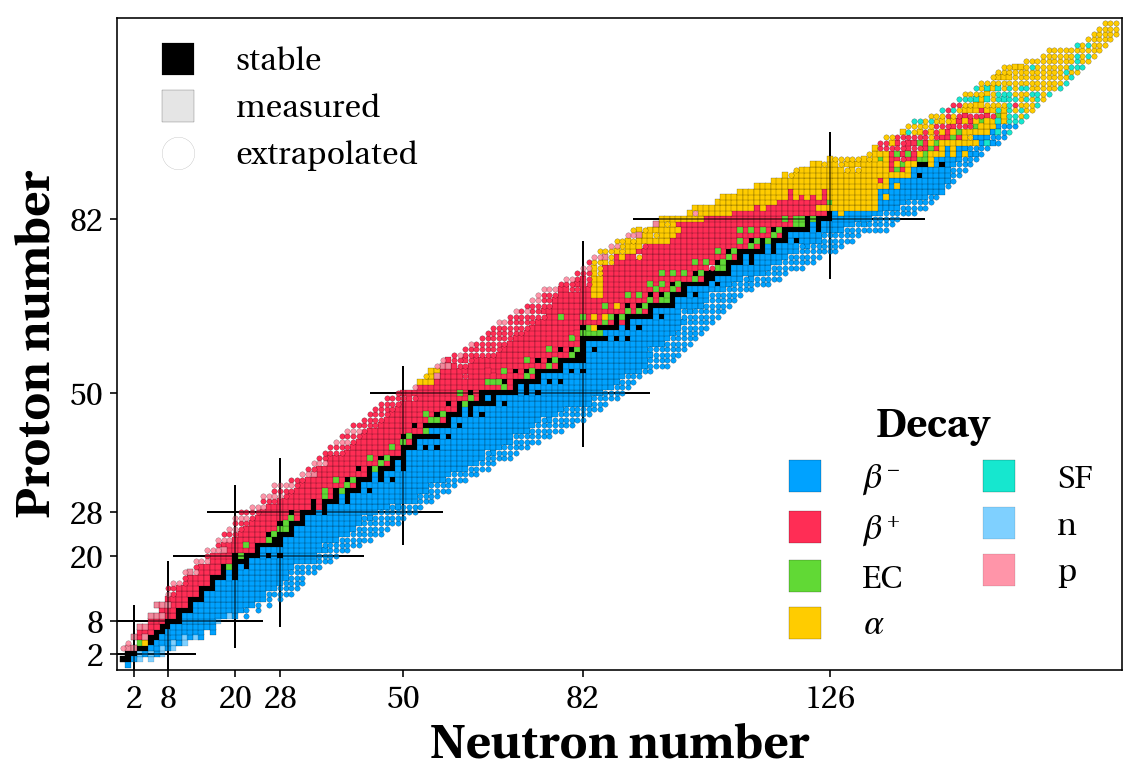

In [4]:
%config InlineBackend.figure_format ='retina'

import matplotlib.pyplot as plt
import matplotlib as mpl

# Utopia LaTeX font with greek letters
mpl.rc('font', family='serif', serif='Linguistics Pro')
mpl.rc('text', usetex=False)
mpl.rc('mathtext', fontset='custom',
       rm='Linguistics Pro',
       it='Linguistics Pro:italic',
       bf='Linguistics Pro:bold')

# plotting the different decay modes
f, ax = plt.subplots(1,1,figsize=(9,6))

# only measured values of ground states
nubase_df[(nubase_df.t_1_2 == 'stbl')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='stable', lw=0, marker='s', markersize=2.7, markerfacecolor='k', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'IS')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='k', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B-')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='$\\beta^-$', lw=0, marker='s', markersize=2.7, markerfacecolor='#00A2FF', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B+')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='$\\beta^+$', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D55', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'EC')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='EC', lw=0, marker='s', markersize=2.7, markerfacecolor='#61D935', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'e+')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D55', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'A')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='$\\alpha$', lw=0, marker='s', markersize=2.7, markerfacecolor='#FFCC00', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'n')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='n', lw=0, marker='s', markersize=2.7, markerfacecolor='#00A2FF', alpha=0.5, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'SF')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='SF', lw=0, marker='s', markersize=2.7, markerfacecolor='#16E7CF', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='measured', lw=0, marker='s', markersize=2.7, markerfacecolor='#E5E5E5', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='p', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D55', alpha=0.5, markeredgewidth=0.1, markeredgecolor='k')

# displaying extrapolated values of ground states
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B-')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#00A2FF', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B+')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#FF2D55', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'A')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#FFCC00', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'SF')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#16E7CF', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='extrapolated', lw=0, marker='o', markersize=2.7, markerfacecolor='white', alpha=0.5, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#FF2D55', alpha=0.5, markeredgewidth=0.1, markeredgecolor='k')

# inserting lines to display the magic numbers
magic_nrs = [2, 8, 20, 28, 50, 82, 126]
for magic in magic_nrs:
    plt.hlines(y=magic, xmin=nubase_df[nubase_df.Z == magic].N.min()-5, xmax=nubase_df[nubase_df.Z == magic].N.max()+5, color='k', linewidth=1)
    plt.vlines(x=magic, ymin=nubase_df[nubase_df.N == magic].Z.min()-5, ymax=nubase_df[nubase_df.N == magic].Z.max()+5, color='k', linewidth=1)
    plt.hlines(y=magic, xmin=nubase_df[nubase_df.Z == magic].N.min()-5, xmax=nubase_df[nubase_df.Z == magic].N.max()+5, color='k', alpha=0.5, linewidth=1, zorder=50)
    plt.vlines(x=magic, ymin=nubase_df[nubase_df.N == magic].Z.min()-5, ymax=nubase_df[nubase_df.N == magic].Z.max()+5, color='k', alpha=0.5, linewidth=1, zorder=50)
    
# standardized figure parameters
ax.set_xlabel('Neutron number', fontsize=24, fontweight='bold')
ax.set_ylabel('Proton number', fontsize=24, fontweight='bold')
plt.xticks(magic_nrs, magic_nrs)
plt.yticks(magic_nrs, magic_nrs)
ax.set_xlim(-1, nubase_df.N.max()+1)
ax.set_ylim(-1, nubase_df.Z.max()+1)

plt.tick_params(labelsize=16)

handles, labels = ax.get_legend_handles_labels()    # allows splitting the legend
handles1 = [handles[1],handles[2],handles[3],handles[4],handles[6],handles[5],handles[8]]
handles2 = [handles[0],handles[7],handles[9]]

lg1 = ax.legend(handles=handles1,loc=4,title = 'Decay', markerscale=6,fontsize=16, ncol=2, edgecolor='white')
plt.setp(lg1.get_title(),fontsize=20,fontweight='bold')    # legend title bold
plt.gca().add_artist(lg1)
lg2 = ax.legend(handles=handles2,loc=2,fontsize=16, markerscale=6, ncol=1, edgecolor='white')
plt.setp(lg2.get_title(),fontsize=20,fontweight='bold')    # legend title bold

plt.savefig('nuclear-chart.pdf',bbox_inches='tight',pad_inches=0)
plt.show()

# ISOLDE yields

/usr/local/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x1120e6d90> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/usr/local/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x1120e5650> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/usr/local/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x1120e4590> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/usr/local/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x1120ed910> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, labe

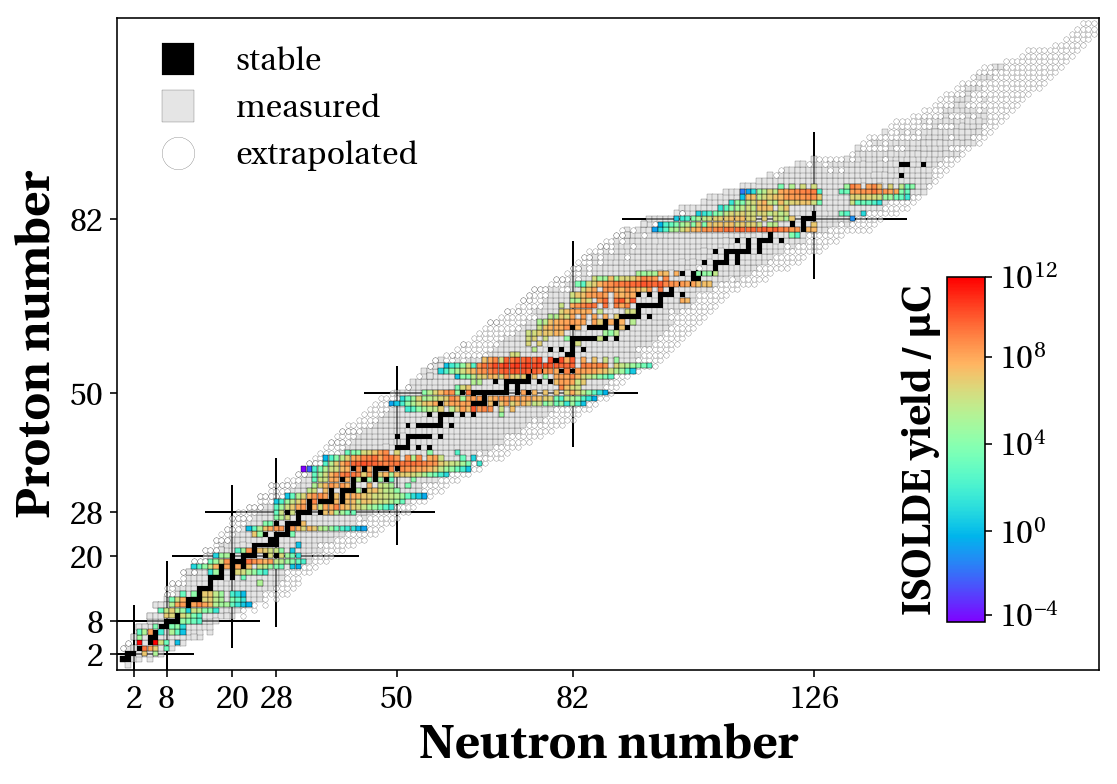

In [5]:
%config InlineBackend.figure_format ='retina'

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

# Utopia LaTeX font with greek letters
mpl.rc('font', family='serif', serif='Linguistics Pro')
mpl.rc('text', usetex=False)
mpl.rc('mathtext', fontset='custom',
       rm='Linguistics Pro',
       it='Linguistics Pro:bold',
       bf='Linguistics Pro:bold')

# plotting the different decay modes
f, ax = plt.subplots(1,1,figsize=(8.8,6))
plt.tick_params(labelsize=16)

# measured masses
nubase_df[(nubase_df.t_1_2 == 'stbl')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='stable', lw=0, marker='s', markersize=2.7, markerfacecolor='k', markeredgewidth=0.1, markeredgecolor='k', zorder=3)
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'IS')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='k', markeredgewidth=0.1, markeredgecolor='k', zorder=3)
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B-')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#E5E5E5', markeredgewidth=0.1, markeredgecolor='k', zorder=3)
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B+')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#E5E5E5', markeredgewidth=0.1, markeredgecolor='k', zorder=3)
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'EC')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#E5E5E5', markeredgewidth=0.1, markeredgecolor='k', zorder=3)
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'e+')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#E5E5E5', markeredgewidth=0.1, markeredgecolor='k', zorder=3)
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'A')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#E5E5E5', markeredgewidth=0.1, markeredgecolor='k', zorder=3)
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'n')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#E5E5E5', markeredgewidth=0.1, markeredgecolor='k', zorder=3)
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'SF')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#E5E5E5', markeredgewidth=0.1, markeredgecolor='k', zorder=3)
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='measured', lw=0, marker='s', markersize=2.7, markerfacecolor='#E5E5E5', markeredgewidth=0.1, markeredgecolor='k', zorder=3)
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#E5E5E5', markeredgewidth=0.1, markeredgecolor='k', zorder=3)

# extrapolated masses
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B-')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='white', markeredgewidth=0.1, markeredgecolor='k', zorder=3)
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B+')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='white', markeredgewidth=0.1, markeredgecolor='k', zorder=3)
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'A')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='white', markeredgewidth=0.1, markeredgecolor='k', zorder=3)
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'SF')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='white', markeredgewidth=0.1, markeredgecolor='k', zorder=3)
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='extrapolated', lw=0, marker='o', markersize=2.7, markerfacecolor='white', markeredgewidth=0.1, markeredgecolor='k', zorder=3)
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='white', markeredgewidth=0.1, markeredgecolor='k', zorder=3)


# inserting lines to display the magic numbers
magic_nrs = [2, 8, 20, 28, 50, 82, 126]
for magic in magic_nrs:
    ax.hlines(y=magic, xmin=nubase_df[nubase_df.Z == magic].N.min()-5, xmax=nubase_df[nubase_df.Z == magic].N.max()+5, color='k', linewidth=1, zorder=1)
    ax.vlines(x=magic, ymin=nubase_df[nubase_df.N == magic].Z.min()-5, ymax=nubase_df[nubase_df.N == magic].Z.max()+5, color='k', linewidth=1, zorder=2)
    ax.hlines(y=magic, xmin=nubase_df[nubase_df.Z == magic].N.min()-5, xmax=nubase_df[nubase_df.Z == magic].N.max()+5, color='k', alpha=0.5, linewidth=1, zorder=4)
    ax.vlines(x=magic, ymin=nubase_df[nubase_df.N == magic].Z.min()-5, ymax=nubase_df[nubase_df.N == magic].Z.max()+5, color='k', alpha=0.5, linewidth=1, zorder=5)

# plot yield with a colormap in a logarithmic fashion
sc = ax.scatter(x=nubase_df.N.tolist(), y=nubase_df.Z.tolist(), c=nubase_df.isolde_yields_log.tolist(),
                s=7, marker='s', edgecolors='k', linewidths=.2, cmap='rainbow',zorder=6)    

# inserting the color map
ax2 = f.add_axes([0.78, 0.18, 0.03, 0.4])
cbar = plt.colorbar(sc, cax=ax2, ticks=[np.log(6e-04),np.log(4e+00),np.log(4e+04),np.log(4e+08),np.log(2e+12)])
ax2.set_ylabel('ISOLDE yield / $\mu$C', fontsize=20, fontweight='bold', labelpad=-80)
cbar.ax.set_yticklabels(['$10^{-4}$','$10^{0}$','$10^{4}$','$10^{8}$','$10^{12}$'])

plt.tick_params(axis='both', which='major', labelsize=16)


# standardized figure parameters
ax.set_xlabel('Neutron number', fontsize=24, fontweight='bold')
ax.set_ylabel('Proton number', fontsize=24, fontweight='bold')
ax.set_xticks(magic_nrs)
ax.set_yticks(magic_nrs)
ax.set_xlim(-1, nubase_df.N.max()+1)
ax.set_ylim(-1, nubase_df.Z.max()+1)


lg = ax.legend(fontsize=16, markerscale=6, loc=2, ncol=1, edgecolor='white')
plt.setp(lg.get_title(),fontsize=20,fontweight='bold')    # legend title bold


plt.savefig('nuclear-chart-isolde-yield.pdf',bbox_inches='tight',pad_inches=0)
plt.show()

# Mass precision chart

'LinguisticsPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


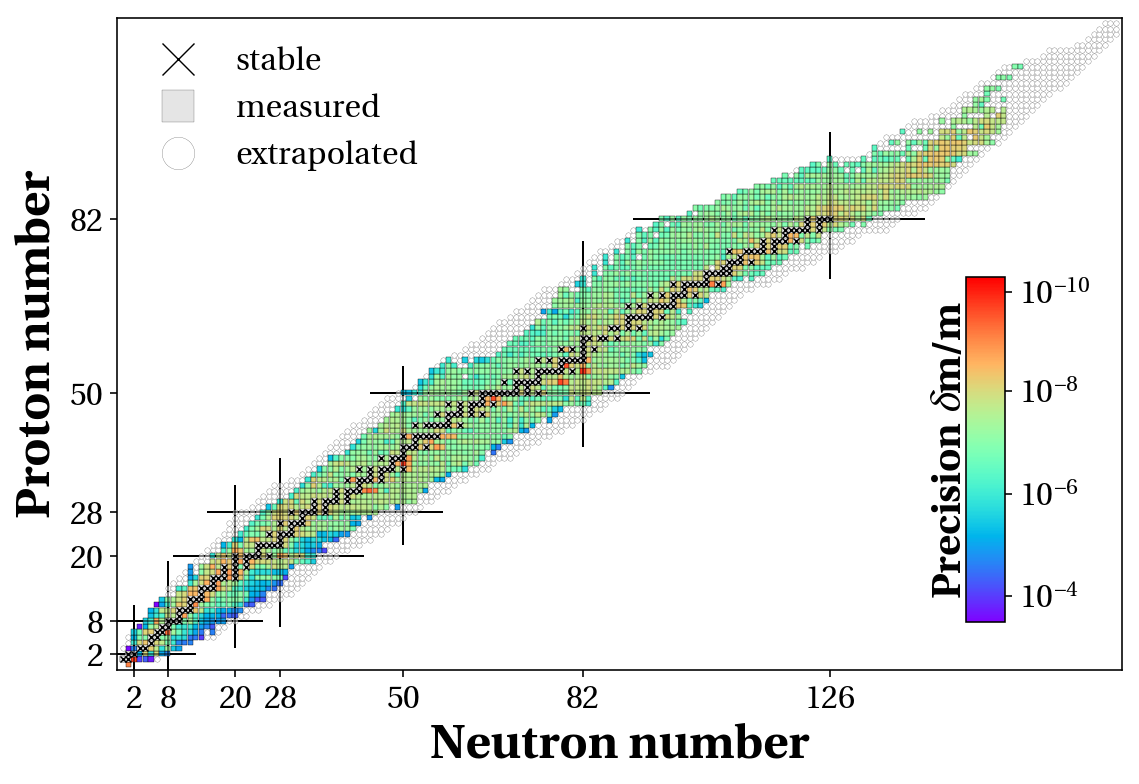

In [6]:
%config InlineBackend.figure_format ='retina'

import matplotlib.pyplot as plt
import matplotlib as mpl

# Utopia LaTeX font with greek letters
mpl.rc('font', family='serif', serif='Linguistics Pro')
mpl.rc('text', usetex=False)
mpl.rc('mathtext', fontset='custom',
       rm='Linguistics Pro',
       it='Linguistics Pro:italic',
       bf='Linguistics Pro:bold')

# plotting the different decay modes
f, ax = plt.subplots(1,1,figsize=(9,6))
plt.tick_params(labelsize=16)

# log-plot of mass uncertainty
sc_m_unc = ax.scatter(x=ame_df.N.tolist(), y=ame_df.Z.tolist(), c=ame_df.mass_prec.tolist(),
                      s=7, marker='s', edgecolors='k', linewidths=.2, cmap='rainbow',zorder=3)
# plotting the stable and extrapolated isotopes
nubase_df[(nubase_df.t_1_2 == 'stbl')&(nubase_df.yr < 2020)].plot(x='N', y='Z', ax=ax, label='stable', lw=0, marker='x', markersize=2.7, markerfacecolor='k', markeredgewidth=0.7, markeredgecolor='k',zorder=4)
nubase_df[(nubase_df.t_1_2 == 'stbl')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='measured', lw=0, marker='s', markersize=2.7, markerfacecolor='#E5E5E5', markeredgewidth=0.1, markeredgecolor='k', zorder=3)
ame_df[ame_df.extrapol == True].plot(x='N', y='Z', ax=ax, label='extrapolated', lw=0, marker='o', markersize=2.7, markerfacecolor='white', markeredgewidth=0.1, markeredgecolor='k',zorder=2)

# inserting lines to display the magic numbers
magic_nrs = [2, 8, 20, 28, 50, 82, 126]
for magic in magic_nrs:
    ax.hlines(y=magic, xmin=nubase_df[nubase_df.Z == magic].N.min()-5, xmax=nubase_df[nubase_df.Z == magic].N.max()+5, color='k', linewidth=1, zorder=1)
    ax.vlines(x=magic, ymin=nubase_df[nubase_df.N == magic].Z.min()-5, ymax=nubase_df[nubase_df.N == magic].Z.max()+5, color='k', linewidth=1, zorder=2)
    ax.hlines(y=magic, xmin=nubase_df[nubase_df.Z == magic].N.min()-5, xmax=nubase_df[nubase_df.Z == magic].N.max()+5, color='k', alpha=0.5, linewidth=1, zorder=5)
    ax.vlines(x=magic, ymin=nubase_df[nubase_df.N == magic].Z.min()-5, ymax=nubase_df[nubase_df.N == magic].Z.max()+5, color='k', alpha=0.5, linewidth=1, zorder=6)

# inserting the color map
ax2 = f.add_axes([0.78, 0.18, 0.03, 0.4])
cbar = plt.colorbar(sc_m_unc, cax=ax2, ticks=[np.log(abs(np.log(3e-11))),np.log(abs(np.log(1e-8))),
                                              np.log(abs(np.log(1e-6))),np.log(abs(np.log(3e-5)))])
ax2.set_ylabel('Precision $\delta$m/m', fontsize=20, fontweight='bold', labelpad=-80)
cbar.ax.set_yticklabels(['$10^{-10}$','$10^{-8}$','$10^{-6}$','$10^{-4}$'])

plt.tick_params(axis='both', which='major', labelsize=16)

# standardized figure parameters
ax.set_xlabel('Neutron number', fontsize=24, fontweight='bold')
ax.set_ylabel('Proton number', fontsize=24, fontweight='bold')
ax.set_xticks(magic_nrs)
ax.set_yticks(magic_nrs)
ax.set_xlim(-1, nubase_df.N.max()+1)
ax.set_ylim(-1, nubase_df.Z.max()+1)

lg = ax.legend(fontsize=16, markerscale=6, loc=2, ncol=1, edgecolor='white')
plt.setp(lg.get_title(),fontsize=20,fontweight='bold')    # legend title bold

plt.savefig('nuclear-chart-mass-unc.pdf',bbox_inches='tight',pad_inches=0)
plt.show()

# Isotopes measured/published at ISOLTRAP since 2017

'LinguisticsPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


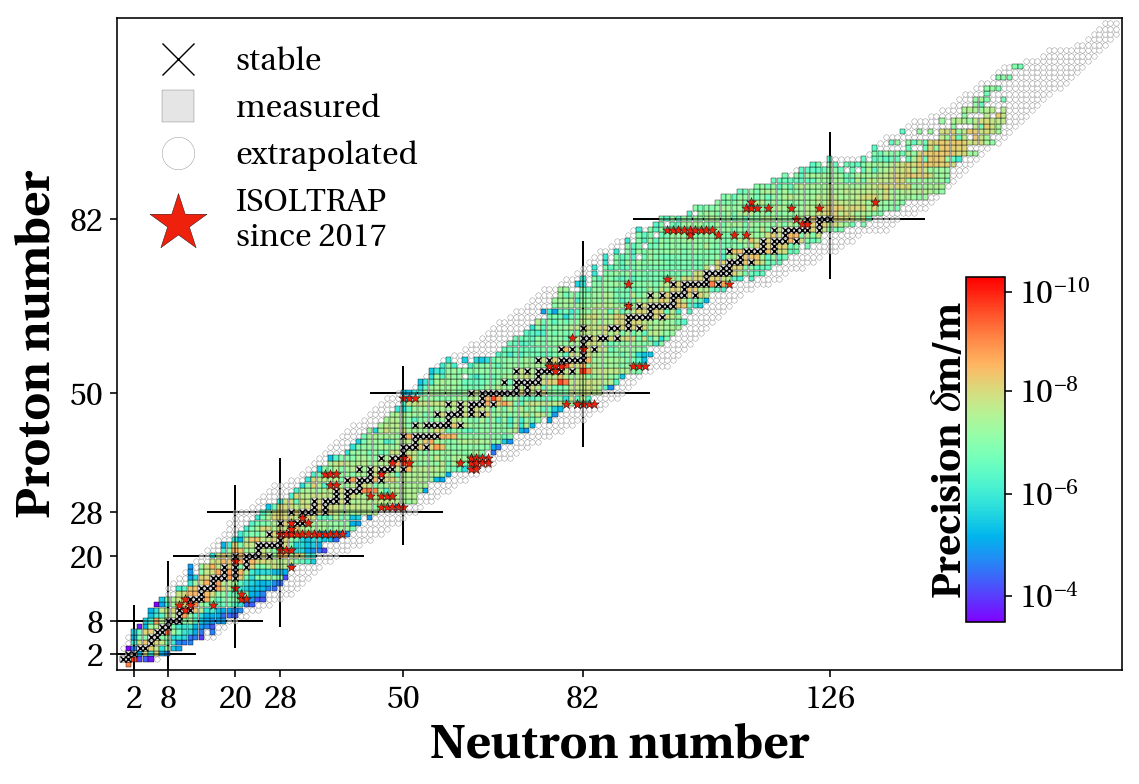

In [7]:
%config InlineBackend.figure_format ='retina'

import matplotlib.pyplot as plt
import matplotlib as mpl

# Utopia LaTeX font with greek letters
mpl.rc('font', family='serif', serif='Linguistics Pro')
mpl.rc('text', usetex=False)
mpl.rc('mathtext', fontset='custom',
       rm='Linguistics Pro',
       it='Linguistics Pro:italic',
       bf='Linguistics Pro:bold')

# plotting the different decay modes
f, ax = plt.subplots(1,1,figsize=(9,6))
plt.tick_params(labelsize=16)

# loglog-plot of mass uncertainty
sc_m_unc = ax.scatter(x=ame_df.N.tolist(), y=ame_df.Z.tolist(), c=ame_df.mass_prec.tolist(),
                      s=7, marker='s', edgecolors='k', linewidths=.2, cmap='rainbow',zorder=3)

# plotting the stable and extrapolated isotopes
nubase_df[(nubase_df.t_1_2 == 'stbl')&(nubase_df.yr < 2020)].plot(x='N', y='Z', ax=ax, label='stable', lw=0, marker='x', markersize=2.7, markerfacecolor='k', markeredgewidth=0.7, markeredgecolor='k',zorder=4)
nubase_df[(nubase_df.t_1_2 == 'stbl')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='measured', lw=0, marker='s', markersize=2.7, markerfacecolor='#E5E5E5', markeredgewidth=0.1, markeredgecolor='k', zorder=3)
ame_df[ame_df.extrapol == True].plot(x='N', y='Z', ax=ax, label='extrapolated', lw=0, marker='o', markersize=2.7, markerfacecolor='white', markeredgewidth=0.1, markeredgecolor='k',zorder=2)


# inserting lines to display the magic numbers
magic_nrs = [2, 8, 20, 28, 50, 82, 126]
for magic in magic_nrs:
    plt.hlines(y=magic, xmin=nubase_df[nubase_df.Z == magic].N.min()-5, xmax=nubase_df[nubase_df.Z == magic].N.max()+5, color='k', linewidth=1, zorder=1)
    plt.vlines(x=magic, ymin=nubase_df[nubase_df.N == magic].Z.min()-5, ymax=nubase_df[nubase_df.N == magic].Z.max()+5, color='k', linewidth=1, zorder=1)
    plt.hlines(y=magic, xmin=nubase_df[nubase_df.Z == magic].N.min()-5, xmax=nubase_df[nubase_df.Z == magic].N.max()+5, color='k', alpha=0.5, linewidth=1, zorder=50)
    plt.vlines(x=magic, ymin=nubase_df[nubase_df.N == magic].Z.min()-5, ymax=nubase_df[nubase_df.N == magic].Z.max()+5, color='k', alpha=0.5, linewidth=1, zorder=50)
        

# lists of measured or published masses since 2017 at the ISOLTRAP setup at CERN/ISOLDE
masses_2017__ = ['39K', '85Rb', '133Cs',    # offline source
                 '88Sr', '88Rb',    # 2017-05 ArKr
                 '127Cd', '129Cd', '130Cd', '131Cd', '132Cd',    # 2017-07 Cd
                 '131Cs',    # 2017-07 Cs
                 '48Ar', '98Kr', '99Kr',    # 2017-08 ArKr
                 '49Sc', '50Sc', '51Sc', '99In', '100In', '101In',    # 2018-04 ScIn
                 '70As', '71As', '71Br', '72Br', '73Br', '81Br']    # 2018-05 Br
publications_2017__ = ['27Na', '97Rb', '99Rb', '100Rb', '100Sr', '103Sr', '129Cd',    # R. Wolf - Nucl.Instrum. Meth. B 376, 275-280 (2016)
                       '132Cs', '146Cs', '147Cs', '148Cs',    # D. Atanasov - J. Phys. G 44, 064008 (2017)
                       '185Au', '197At', '219At', '180Au', '188Au', '190Au',    # V. Manea - Phys. Rev. C 95, 054322 (2017)
                       '100Sr', '101Sr', '102Sr', '100Rb', '101Rb', '102Rb',    # A. de Roubin - Phys. Rev. C 96, 014310 (2017)
                       '202Pb', '202Tl', '203Tl',    # A. Welker - Eur. Phys. J. A 53, 153 (2017)
                       '75Cu', '76Cu', '77Cu', '78Cu', '79Cu',    # A. Welker - Phys. Rev. Lett. 119, 192502 (2017)
                       '195Po', '196Po', '197Po', '199Po', '203Po', '208Po',    # N. Althubiti - Phys. Rev. C 96, 044325 (2017)
                       '58Cr', '59Cr', '60Cr', '61Cr', '62Cr', '63Cr',    # M. Mougeot - Phys. Rev. Lett. 120, 232501 (2018)
                       '177Hg', '178Hg', '179Hg', '180Hg', '181Hg', '182Hg', '183Hg', '184Hg', '185Hg',    # B. Marsh - Nature Physics 14, 1163 (2018) 
                       '131Cs', '131Xe',    # J. Karthein - Hyperfine Interact (2019) 240: 61
                       '52Cr', '53Cr', '54Cr', '55Cr', '56Cr', '57Cr', '55Mn', '56Fe', '59Fe', '59Co', '75Ga', '77Ga', '78Ga', '79Ga', '140Ce', '140Nd', '156Dy', '160Yb', '168Lu', '178Yb',    # W.J. Huang - Eur. Phys. J. A (2019) 55: 96.
                       '33Mg', '34Mg', '34Si', '34Al',    # P. Ascher - Phys. Rev. C 100, 014304 (2019)
                       '21Na', '21Ne', '23Mg', '23Na']    # J. Karthein - Phys. Rev. C 100, 015502 (2019)

# plotting those measured masses
ax.scatter(x=[i[0] for i in [nubase_df.N[nubase_df.index == i].tolist() for i in masses_2017__+publications_2017__]],
            y=[i[0] for i in [nubase_df.Z[nubase_df.index == i].tolist() for i in masses_2017__+publications_2017__]],
            s=25, marker='*', c='#EE220C', edgecolors='k', linewidths=.2, zorder=10, label='ISOLTRAP\nsince 2017')

# inserting the color map
ax2 = f.add_axes([0.78, 0.18, 0.03, 0.4])
cbar = plt.colorbar(sc_m_unc, cax=ax2, ticks=[np.log(abs(np.log(3e-11))),np.log(abs(np.log(1e-8))),
                                              np.log(abs(np.log(1e-6))),np.log(abs(np.log(3e-5)))])
ax2.set_ylabel('Precision $\delta$m/m', fontsize=20, fontweight='bold', labelpad=-80)
cbar.ax.set_yticklabels(['$10^{-10}$','$10^{-8}$','$10^{-6}$','$10^{-4}$'])

# standardized figure parameters
ax.set_xlabel('Neutron number', fontsize=24, fontweight='bold')
ax.set_ylabel('Proton number', fontsize=24, fontweight='bold')
ax.set_xticks(magic_nrs)
ax.set_yticks(magic_nrs)
ax.set_xlim(-1, nubase_df.N.max()+1)
ax.set_ylim(-1, nubase_df.Z.max()+1)
plt.tick_params(axis='both', which='major', labelsize=16)

lg = ax.legend(fontsize=16, markerscale=6, loc=2, ncol=1, edgecolor='white')
plt.setp(lg.get_title(),fontsize=20,fontweight='bold')    # legend title bold

plt.savefig('nuclear-chart-ISOLTRAP-2017--.pdf',bbox_inches='tight',pad_inches=0)
plt.show()

# Carbon cluster coverage

/usr/local/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x112101610> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/usr/local/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x112108550> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/usr/local/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x1121242d0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/usr/local/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x11212bc50> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, labe

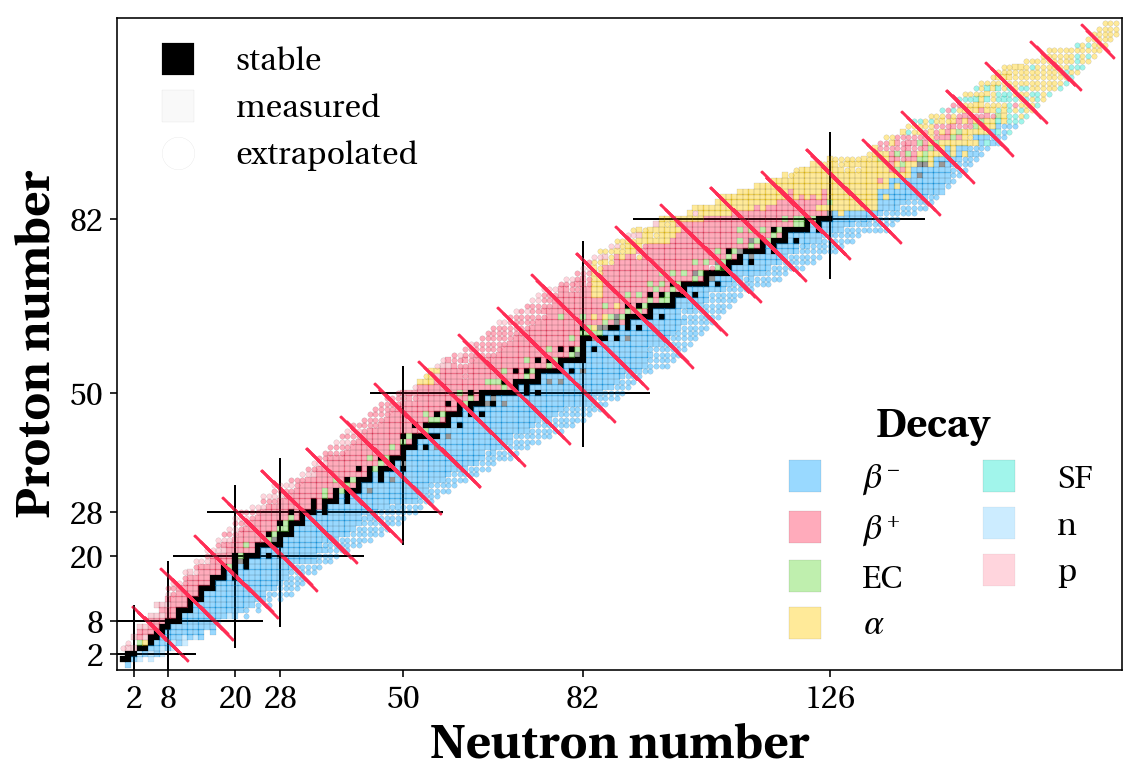

In [8]:
%config InlineBackend.figure_format ='retina'

import matplotlib.pyplot as plt
import matplotlib as mpl

# Utopia LaTeX font with greek letters
mpl.rc('font', family='serif', serif='Linguistics Pro')
mpl.rc('text', usetex=False)
mpl.rc('mathtext', fontset='custom',
       rm='Linguistics Pro',
       it='Linguistics Pro:italic',
       bf='Linguistics Pro:bold')

# plotting the different decay modes
f, ax = plt.subplots(1,1,figsize=(9,6))

alpha_c = 0.4

# only measured values of ground states
nubase_df[(nubase_df.t_1_2 == 'stbl')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='stable', lw=0, marker='s', markersize=2.7, markerfacecolor='k', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'IS')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='k', alpha=alpha_c, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B-')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='$\\beta^-$', lw=0, marker='s', markersize=2.7, markerfacecolor='#00A2FF', alpha=alpha_c, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B+')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='$\\beta^+$', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D55', alpha=alpha_c, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'EC')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='EC', lw=0, marker='s', markersize=2.7, markerfacecolor='#61D935', alpha=alpha_c, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'e+')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D55', alpha=alpha_c, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'A')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='$\\alpha$', lw=0, marker='s', markersize=2.7, markerfacecolor='#FFCC00', alpha=alpha_c, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'n')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='n', lw=0, marker='s', markersize=2.7, markerfacecolor='#00A2FF', alpha=alpha_c*0.5, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'SF')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='SF', lw=0, marker='s', markersize=2.7, markerfacecolor='#16E7CF', alpha=alpha_c, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='measured', lw=0, marker='s', markersize=2.7, markerfacecolor='#E5E5E5', alpha=alpha_c*0.5, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='p', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D55', alpha=alpha_c*0.5, markeredgewidth=0.1, markeredgecolor='k')

# displaying extrapolated values of ground states
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B-')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#00A2FF', alpha=alpha_c, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B+')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#FF2D55', alpha=alpha_c, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'A')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#FFCC00', alpha=alpha_c, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'SF')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#16E7CF', alpha=alpha_c, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='extrapolated', lw=0, marker='o', markersize=2.7, markerfacecolor='white', alpha=alpha_c*0.5, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#FF2D55', alpha=alpha_c*0.5, markeredgewidth=0.1, markeredgecolor='k')

# marking the mass range of carbon clusters
nubase_df[(nubase_df.A % 12 == 0)].plot(x='N', y='Z', ax=ax, lw=0, marker=[(1,-1), (1.1,-0.9), (-0.9,1.1), (-1,1)], markersize=15, c='#FF2D55', mec=None, label='C cluster')

# inserting lines to display the magic numbers
magic_nrs = [2, 8, 20, 28, 50, 82, 126]
for magic in magic_nrs:
    plt.hlines(y=magic, xmin=nubase_df[nubase_df.Z == magic].N.min()-5, xmax=nubase_df[nubase_df.Z == magic].N.max()+5, color='k', linewidth=1, zorder=1)
    plt.vlines(x=magic, ymin=nubase_df[nubase_df.N == magic].Z.min()-5, ymax=nubase_df[nubase_df.N == magic].Z.max()+5, color='k', linewidth=1, zorder=1)
    plt.hlines(y=magic, xmin=nubase_df[nubase_df.Z == magic].N.min()-5, xmax=nubase_df[nubase_df.Z == magic].N.max()+5, color='k', alpha=0.5, linewidth=1, zorder=50)
    plt.vlines(x=magic, ymin=nubase_df[nubase_df.N == magic].Z.min()-5, ymax=nubase_df[nubase_df.N == magic].Z.max()+5, color='k', alpha=0.5, linewidth=1, zorder=50)
    
# standardized figure parameters
ax.set_xlabel('Neutron number', fontsize=24, fontweight='bold')
ax.set_ylabel('Proton number', fontsize=24, fontweight='bold')
plt.xticks(magic_nrs, magic_nrs)
plt.yticks(magic_nrs, magic_nrs)
ax.set_xlim(-1, nubase_df.N.max()+1)
ax.set_ylim(-1, nubase_df.Z.max()+1)

plt.tick_params(labelsize=16)

handles, labels = ax.get_legend_handles_labels()    # allows splitting the legend
handles1 = [handles[1],handles[2],handles[3],handles[4],handles[6],handles[5],handles[8]]
handles2 = [handles[0],handles[7],handles[9]]

lg1 = ax.legend(handles=handles1,loc=4,title = 'Decay', markerscale=6,fontsize=16, ncol=2, edgecolor='white')
plt.setp(lg1.get_title(),fontsize=20,fontweight='bold')    # legend title bold
plt.gca().add_artist(lg1)
lg2 = ax.legend(handles=handles2,loc=2,fontsize=16, markerscale=6, ncol=1, edgecolor='white')
plt.setp(lg2.get_title(),fontsize=20,fontweight='bold')    # legend title bold

plt.savefig('nuclear-chart-carbon-clusters.pdf',bbox_inches='tight',pad_inches=0)
plt.show()